In [29]:
import pandas as pd

# Load the uploaded file
movies_df = pd.read_csv('grouplens_data/ml-latest/movies.csv')
# movies_df = pd.read_csv(file_path)

movies_dict = {}

for index, row in movies_df.iterrows():
    # Remove the last 7 characters from the title
    clean_title = row['title'][:-7].strip()  # Strip removes any trailing spaces
    # Add to dictionary
    movies_dict[row['movieId']] = clean_title

# Show a sample of the resulting dictionary
sample_dict = dict(list(movies_dict.items())[:5])  # Display the first 5 entries as a sample
sample_dict

{1: 'Toy Story',
 2: 'Jumanji',
 3: 'Grumpier Old Men',
 4: 'Waiting to Exhale',
 5: 'Father of the Bride Part II'}

In [30]:
import os

# Folder path containing the .csv files
folder_path = "data"

# Iterate over the filenames in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Remove the file extension and the year at the end
        title_with_year = filename[:-4]  # Remove '.csv'
        title = title_with_year.rsplit(' ', 1)[0]  # Remove the year
        if title in movies_dict.values():  # Check if title matches dictionary
            print(f"Match found: {title}")

In [31]:
import os
import pandas as pd

# Path to folder containing review files
folder_path = "dataset/2_reviews_per_movie_raw"  # Adjust to the actual folder path


# DataFrame to store sampled reviews
all_reviews = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Extract and clean movie title from filename
        title_with_year = filename[:-4]  # Remove '.csv'
        title = title_with_year.rsplit(' ', 1)[0]  # Remove year
        movieId = [key for key, value in movies_dict.items() if value == title]

        if movieId:  # If movie title matches the dictionary
            movieId = movieId[0]  # Get the first matching movieId
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file
            reviews_df = pd.read_csv(file_path)
            
            # Check if the 'review' column exists
            if 'review' in reviews_df.columns:
                # Sample up to 100 reviews
                sampled_reviews = reviews_df['review'].sample(
                    n=min(100, len(reviews_df)), random_state=42
                ).tolist()
                
                # Append sampled reviews to the list
                for review in sampled_reviews:
                    all_reviews.append({
                        "movieId": movieId,
                        "movieTitle": title,
                        "review": review
                    })

# Convert all reviews to a DataFrame
reviews_df = pd.DataFrame(all_reviews)

# Save the reviews for further processing (optional)
output_path = "sampled_reviews.csv"
reviews_df.to_csv(output_path, index=False)

print("Sampled reviews collected and saved successfully!")

Sampled reviews collected and saved successfully!


In [32]:
import os

# Path to check
folder_path = 'dataset/2_reviews_per_movie_raw'

# Check if the directory exists
if os.path.exists(folder_path):
    print(f"The directory '{folder_path}' exists.")
    # List files and subdirectories
    print("Contents of the directory:")
    print(os.listdir(folder_path))
else:
    print(f"The directory '{folder_path}' does not exist.")
    print("Listing available directories:")
    base_path = '../dataset'
    if os.path.exists(base_path):
        directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
        print(f"Directories in '{base_path}': {directories}")
    else:
        print(f"The base path '{base_path}' does not exist either.")


The directory 'dataset/2_reviews_per_movie_raw' exists.
Contents of the directory:
['The Rock 1996.csv', 'The Double Life of Véronique 1991.csv', 'Run, Fat Boy, Run 2007.csv', "The Devil's Advocate 1997.csv", 'Ford v Ferrari 2019.csv', 'The Blair Witch Project 1999.csv', "The King's Speech 2010.csv", 'Despicable Me 2 2013.csv', 'The Mask 1994.csv', 'Saturday Night Fever 1977.csv', 'Insidious: Chapter 2 2013.csv', 'The Lobster 2015.csv', 'The Benchwarmers 2006.csv', 'Moneyball 2011.csv', 'Whip It 2009.csv', 'The Avengers 2012.csv', 'National Treasure: Book of Secrets 2007.csv', 'Blade Runner 2049 2017.csv', 'Million Dollar Arm 2014.csv', 'Angels & Demons 2009.csv', 'Kill Bill: Vol. 2 2004.csv', 'First Man 2018.csv', 'The Hunger Games: Mockingjay - Part 1 2014.csv', 'The Legend of Bagger Vance 2000.csv', 'Vertigo 1958.csv', 'The Adventures of Priscilla, Queen of the Desert 1994.csv', 'Black Swan 2010.csv', 'Changeling 2008.csv', 'Pirates of the Caribbean: On Stranger Tides 2011.csv', 'Me

In [33]:
import pandas as pd
import string
import numpy as np

# # Load the sentiment file
# sentiment_path = 'labMIT-1.0.txt'
# sentiment_df = pd.read_csv(sentiment_path, sep='\t')
sentiment_path = 'labMIT-1.0.txt'

# Load the file, skipping comment lines and providing column names explicitly
column_names = [
    "word",
    "happiness_rank",
    "happiness_average",
    "happiness_standard_deviation",
    "twitter_rank",
    "google_rank",
    "nyt_rank",
    "lyrics_rank"
]
sentiment_df = pd.read_csv(
    sentiment_path,
    sep='\t',  # Tab as delimiter
    comment='#',  # Skip lines starting with '#'
    header=None,  # No header in the file; use custom column names
    names=column_names,  # Assign column names
)
sentiment_df = sentiment_df[['word', 'happiness_average']]
# Keep only relevant columns (word and happiness_average as sentiment score)
# sentiment_df = sentiment_df[['word', 'happiness_average']].dropna()
# sentiment_df = pd.read_csv(sentiment_path, sep='\t', comment='#', usecols=['word', 'happiness_average'], encoding='utf-8')

sentiment_dict = dict(zip(sentiment_df['word'], sentiment_df['happiness_average']))

# Function to clean and tokenize a review
def tokenize_review(review):
    # Remove punctuation and convert to lowercase
    review = review.translate(str.maketrans('', '', string.punctuation)).lower()
    # Split into words
    words = review.split()
    return words

# Function to compute sentiment score for a review
def compute_sentiment(review, sentiment_dict):
    words = tokenize_review(review)
    sentiment_scores = [sentiment_dict[word] for word in words if word in sentiment_dict]
    if sentiment_scores:
        return np.mean(sentiment_scores)
    else:
        return None  # No sentiment score available for the review

# Sample reviews DataFrame (replace with actual reviews DataFrame)
# reviews_sampled_df should have columns: 'movieId', 'movieTitle', 'review'
reviews_sampled_df = pd.read_csv("sampled_reviews.csv")  # Replace with your actual reviews file

# Compute sentiment for each review
reviews_sampled_df['sentiment_score'] = reviews_sampled_df['review'].apply(lambda r: compute_sentiment(r, sentiment_dict))

# Aggregate sentiment scores by movie
movie_sentiments = reviews_sampled_df.groupby('movieId').agg(
    average_sentiment=('sentiment_score', 'mean'),
    review_count=('sentiment_score', 'count')
).reset_index()

# Save or display results
output_path = "movie_sentiment_scores.csv"
movie_sentiments.to_csv(output_path, index=False)

In [35]:
# movies_with_genres_path = 'movies.csv'
movies_with_genres = pd.read_csv('grouplens_data/ml-latest/movies.csv')


# Load the sentiment scores and sampled reviews file
sentiment_scores_path = 'movie_sentiment_scores.csv'
sampled_reviews_path = 'sampled_reviews.csv'

movie_sentiments = pd.read_csv(sentiment_scores_path)
sampled_reviews = pd.read_csv(sampled_reviews_path)

# Merge the sentiment scores with the genres file
movies_with_sentiments = pd.merge(movie_sentiments, movies_with_genres, on='movieId', how='left')

# Split genres for each movie and create an exploded DataFrame for genre analysis
movies_with_sentiments['genres'] = movies_with_sentiments['genres'].str.split('|')
movies_exploded = movies_with_sentiments.explode('genres')

# Compute average sentiment score for each genre
genre_sentiment_analysis = movies_exploded.groupby('genres').agg(
    average_sentiment=('average_sentiment', 'mean'),
    total_movies=('movieId', 'count')
).reset_index()

# Save or display the results for sentiment scores by genres
output_path_genres = "genre_sentiment_scores.csv"
genre_sentiment_analysis.to_csv(output_path_genres, index=False)
print("all done")


all done


In [36]:

# Paths to the files
ratings_file_path = 'grouplens_data/ml-latest/ratings.csv' # Replace with the path to your ratings.csv file
sentiment_scores_file_path = 'movie_sentiment_scores.csv'  # Path to sentiment scores

# Load the ratings file
ratings_df = pd.read_csv(ratings_file_path)

# Compute average rating for each movie
average_ratings = ratings_df.groupby('movieId').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Load the sentiment scores file
sentiment_scores_df = pd.read_csv(sentiment_scores_file_path)

# Merge average ratings with sentiment scores based on movieId
comparison_df = pd.merge(average_ratings, sentiment_scores_df, on='movieId', how='inner')

# Save the result for further analysis
output_path = 'movie_ratings_vs_sentiments.csv'  # Output file
comparison_df.to_csv(output_path, index=False)

# Calculate correlation between average ratings and sentiment scores
correlation = comparison_df['average_rating'].corr(comparison_df['average_sentiment'])
print(f"Correlation between average rating and sentiment score: {correlation}")


Correlation between average rating and sentiment score: 0.054623989759188356


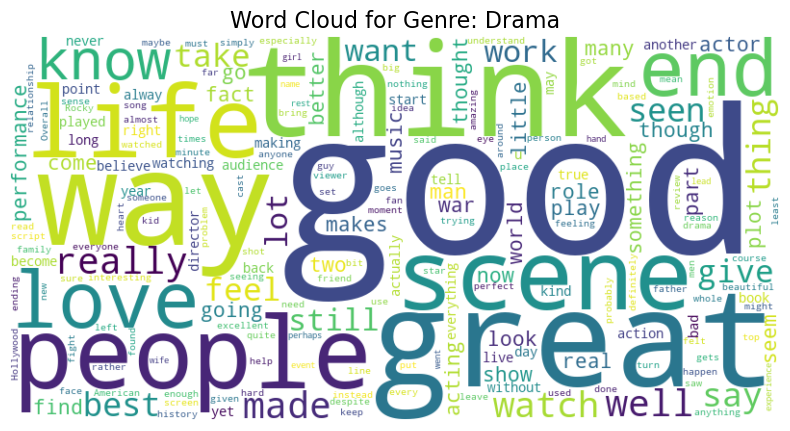

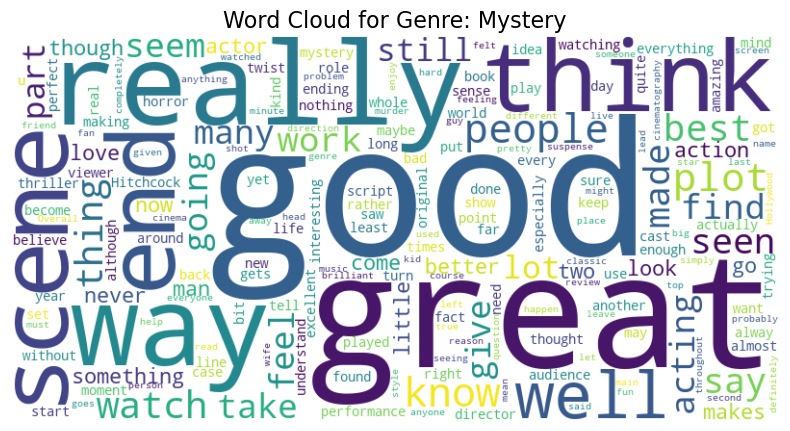

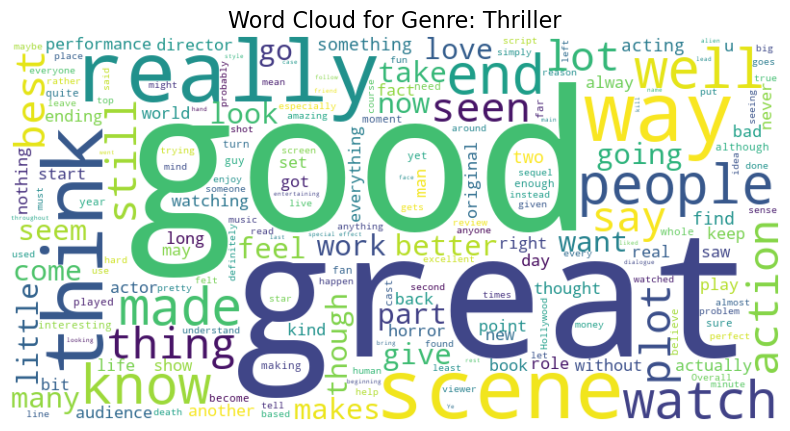

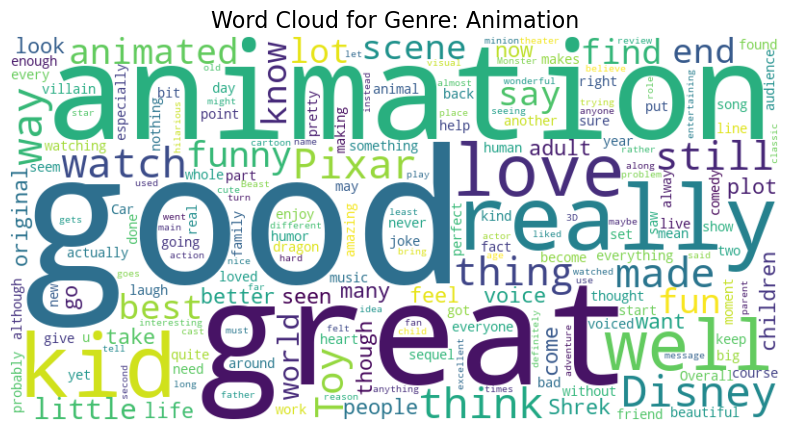

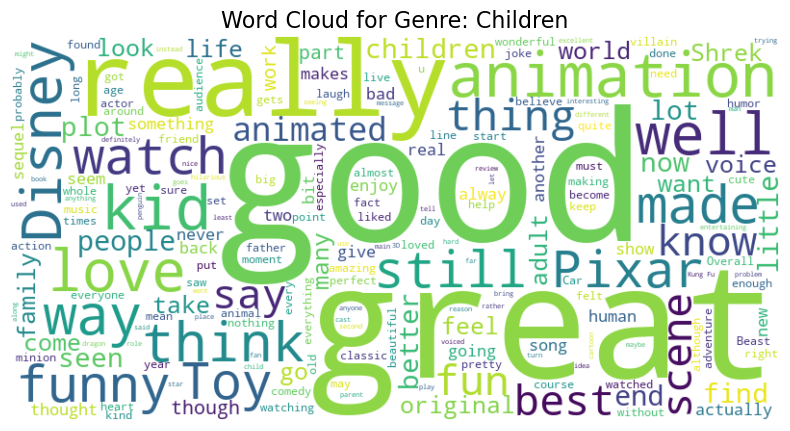

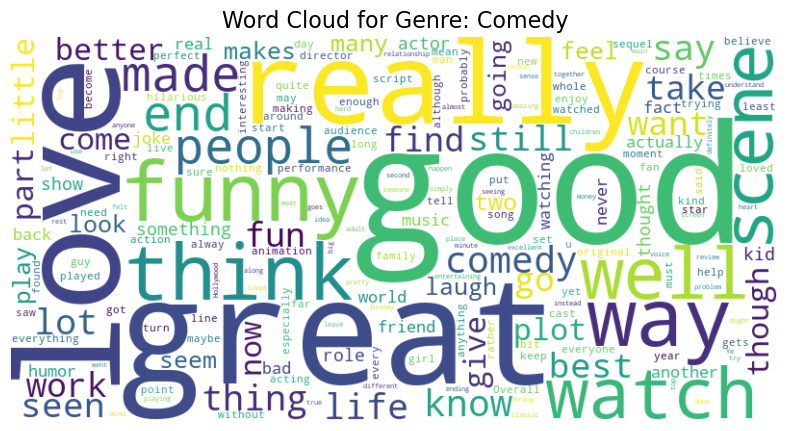

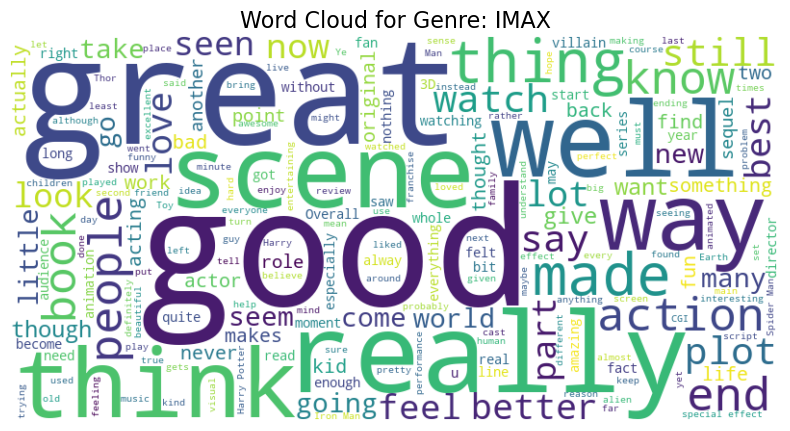

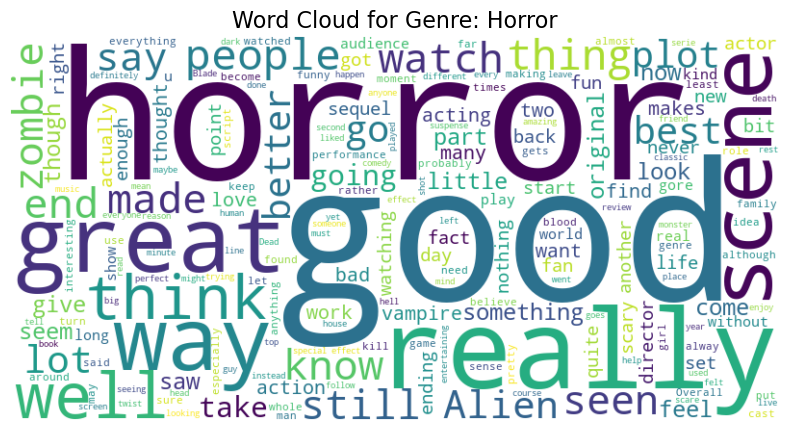

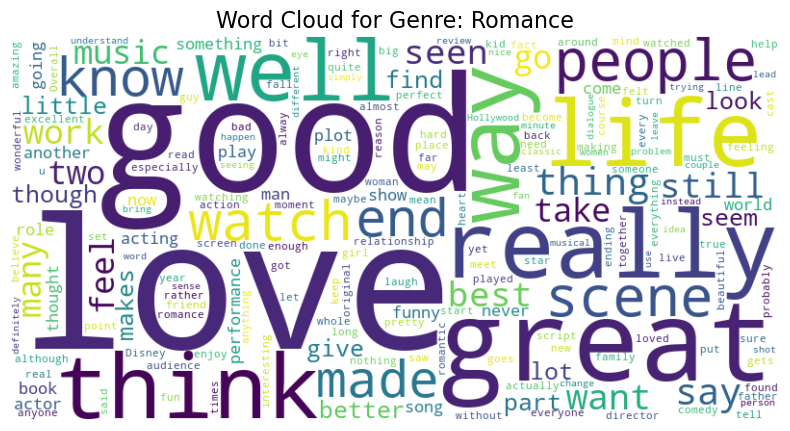

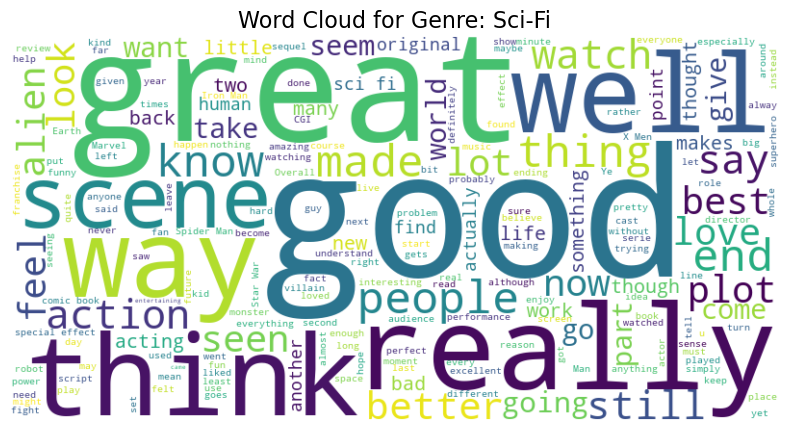

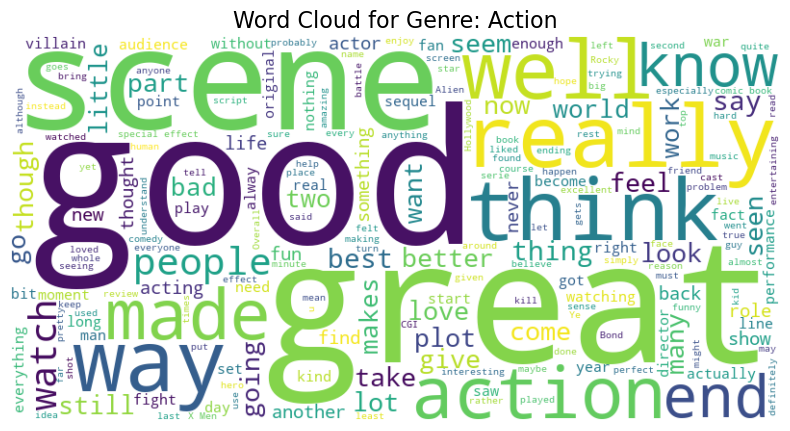

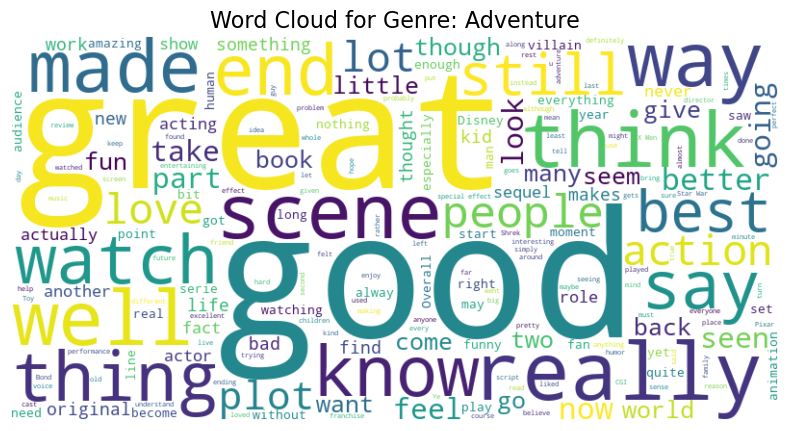

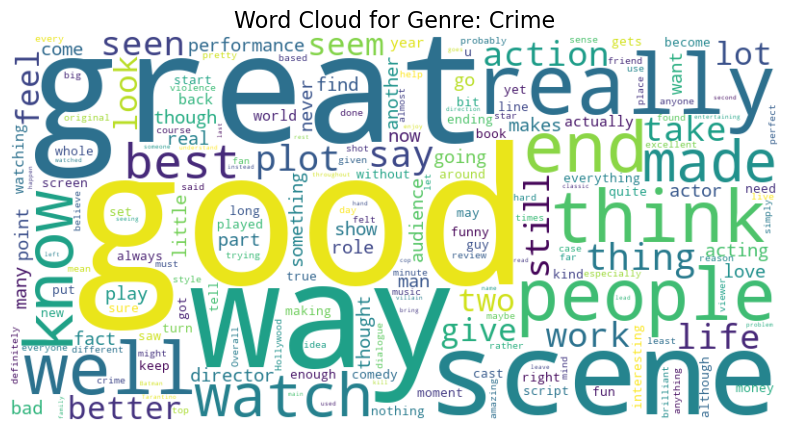

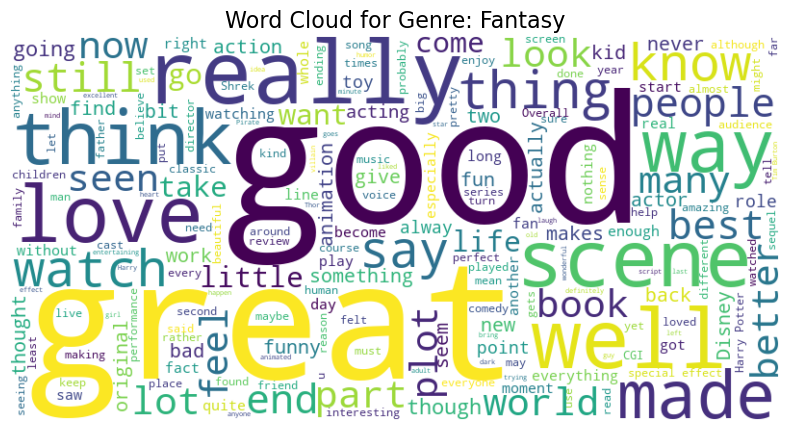

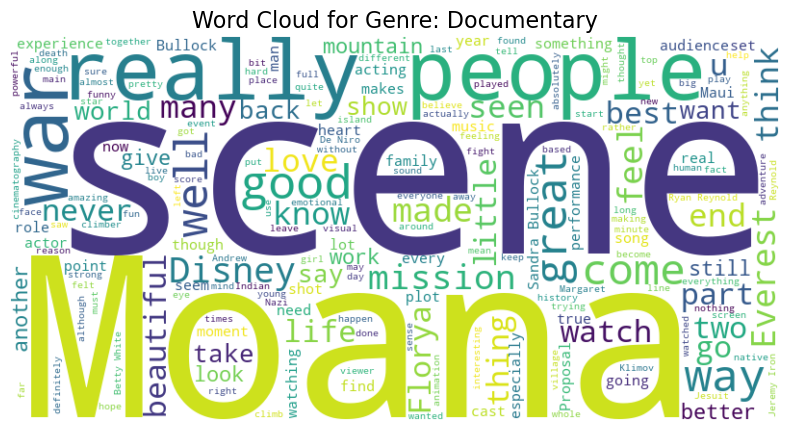

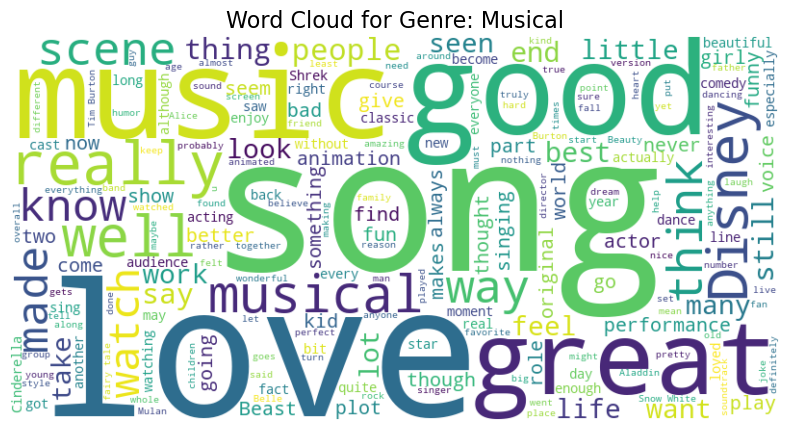

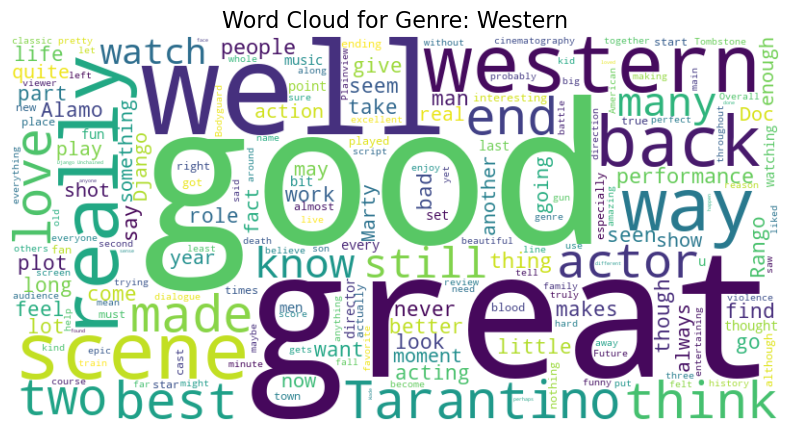

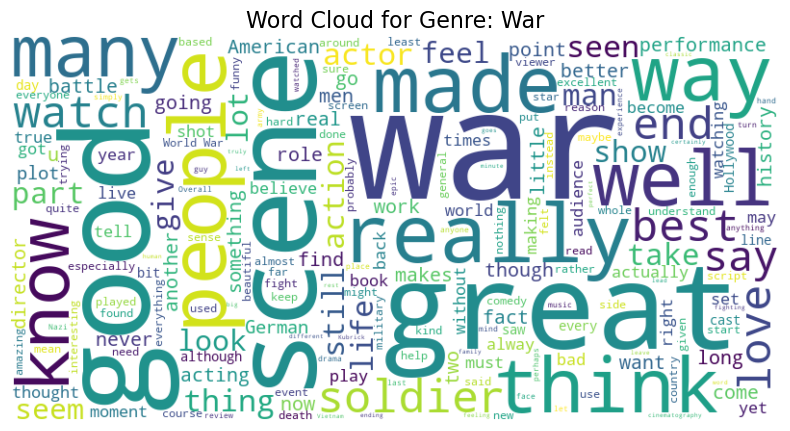

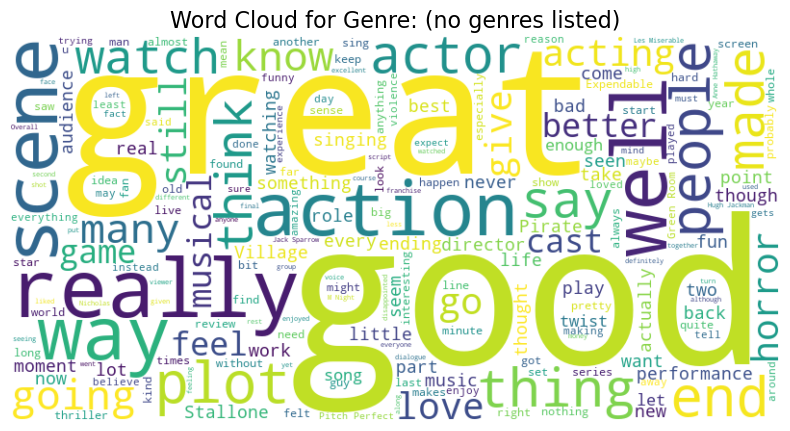

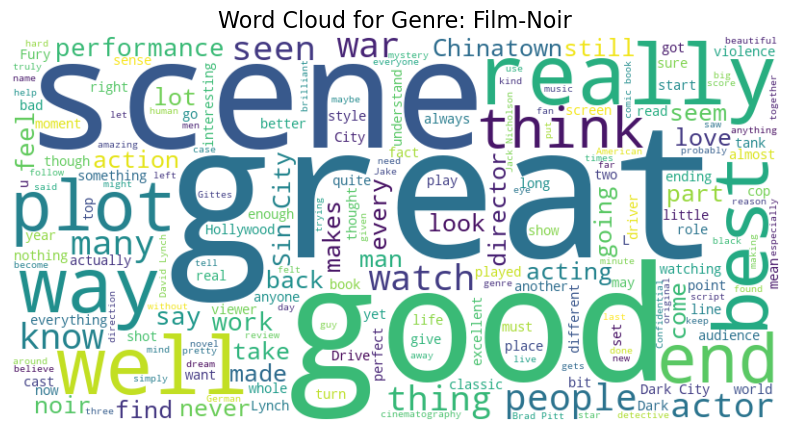

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming movies_exploded contains the exploded DataFrame with 'genres' and 'review' columns
# Ensure reviews are in one DataFrame linked to genres (use your actual file paths)
reviews_path = "sampled_reviews.csv"  # Replace with your file
movies_with_genres_path = 'grouplens_data/ml-latest/movies.csv'  # Replace with your file

# Load data
reviews_df = pd.read_csv(reviews_path)
movies_with_genres = pd.read_csv(movies_with_genres_path)

# Merge reviews with genres on movieId
reviews_with_genres = pd.merge(reviews_df, movies_with_genres, on='movieId', how='left')

# Explode genres to separate rows
reviews_with_genres['genres'] = reviews_with_genres['genres'].str.split('|')
reviews_exploded = reviews_with_genres.explode('genres')

# Define additional stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["movie", "film", "one", "story", "character", "characters", "movies", "films", "see", "make", "br", "time", "even", "first", "much", "will"])

# Function to generate word cloud for a genre
def generate_word_cloud(genre, reviews):
    # Filter reviews for the genre
    genre_reviews = " ".join(reviews_exploded[reviews_exploded['genres'] == genre]['review'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='viridis',
        stopwords=custom_stopwords
    ).generate(genre_reviews)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Genre: {genre}", fontsize=16)
    plt.show()

# Generate word clouds for all genres
unique_genres = reviews_exploded['genres'].unique()
for genre in unique_genres:
    generate_word_cloud(genre, reviews_exploded)



In [ ]:
# Folder path containing the .csv files
folder_path = "reviews"
dataframes = []
# Iterate over the filenames in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

        
datasets = {
    'Movies': movies_df,
    'Reviews': reviews_df,
    'Sentiment': sentiment_df,
    'SampledReviews': sampled_reviews,
    'MovieSentiments': movie_sentiments,
    'Ratings': ratings_df,
    'CombinedReviews': combined_df
}

for name, df in datasets.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert to MB
    print(f'SUMMARY FOR DATASET {name}')
    print(f"Memory usage: {memory_usage:.2f} MB")
    print(f'Number of rows: {len(df)}')
    print(f'Number of rows: {len(df.columns)}')
    print('------------------')

SUMMARY FOR DATASET Movies
Memory usage: 11.99 MB
Number of rows: 86537
Number of rows: 3
------------------
SUMMARY FOR DATASET Reviews
Memory usage: 132.78 MB
Number of rows: 88800
Number of rows: 3
------------------
SUMMARY FOR DATASET Sentiment
Memory usage: 0.62 MB
Number of rows: 10222
Number of rows: 2
------------------
SUMMARY FOR DATASET SampledReviews
Memory usage: 132.78 MB
Number of rows: 88800
Number of rows: 3
------------------
SUMMARY FOR DATASET MovieSentiments
Memory usage: 0.02 MB
Number of rows: 884
Number of rows: 3
------------------
SUMMARY FOR DATASET Ratings
Memory usage: 1032.48 MB
Number of rows: 33832162
Number of rows: 4
------------------
SUMMARY FOR DATASET CombinedReviews
Memory usage: 1507.32 MB
Number of rows: 932464
Number of rows: 7
------------------
